--- Pricer Black-Scholes ---


Souhaitez-vous entrer les paramètres manuellement (1) ou utiliser Yahoo Finance pour le spot (2) ?  2
Ticker de l’action (ex: AAPL) :  AAPL



Prix spot de AAPL récupéré : 213.12 $


Prix d’exercice (Strike, K) :  200
Maturité en années (ex : 0.5 pour 6 mois) :  0.5
Taux sans risque (ex : 0.03 pour 3%) :  0.02
Volatilité (σ, ex : 0.25 pour 25%) :  0.25
Type d’option ('call' ou 'put') :  call



Récapitulatif des paramètres saisis :
  ▸ Ticker           : AAPL
  ▸ Prix Spot (S)    : 213.12
  ▸ Strike (K)       : 200.0
  ▸ Maturité (T)     : 0.5 an(s)
  ▸ Volatilité (σ)   : 25.0 %
  ▸ Taux sans risque : 2.00 %
  ▸ Type d’option    : Call

Prix théorique de l’option Call : 23.26 $



Souhaitez-vous afficher le graphe prix vs sous-jacent ? (y/n) :  y


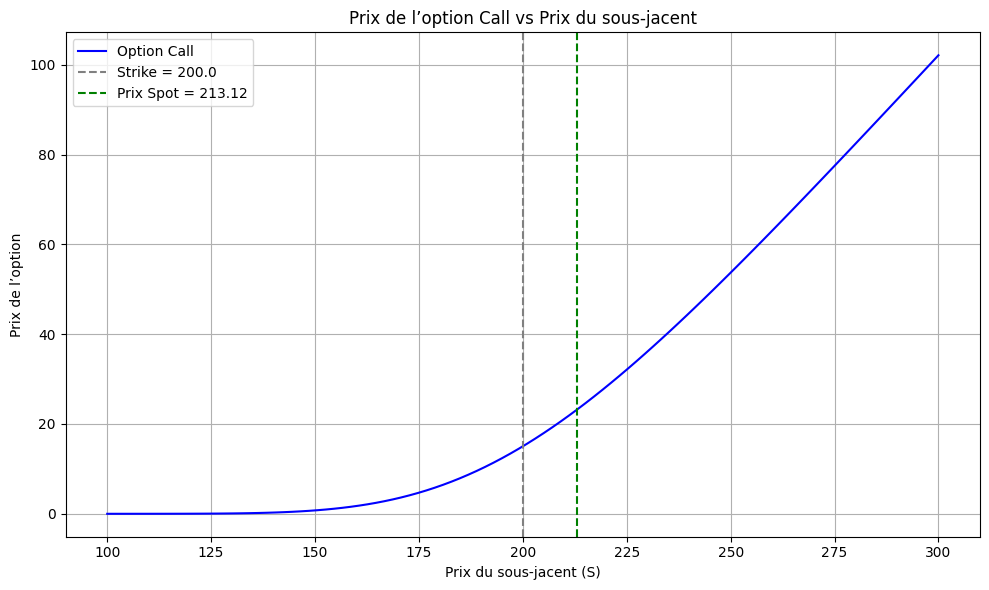

In [1]:
# Pricer Option Black-Scholes Model

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Type d’option non reconnu : 'call' ou 'put' uniquement")

def get_spot_from_yahoo(ticker):
    stock = yf.Ticker(ticker)
    price = stock.history(period="1d")["Close"].iloc[-1]
    print(f"\nPrix spot de {ticker} récupéré : {price:.2f} $")
    return price

def plot_price_vs_spot(K, T, r, sigma, S_actual, option_type='call'):
    S_range = np.linspace(0.5 * K, 1.5 * K, 100)
    prices = [black_scholes(S, K, T, r, sigma, option_type) for S in S_range]

    plt.figure(figsize=(10, 6))
    plt.plot(S_range, prices, label=f'Option {option_type.title()}', color='blue')
    plt.axvline(K, color='gray', linestyle='--', label=f'Strike = {K}')
    plt.axvline(S_actual, color='green', linestyle='--', label=f'Prix Spot = {S_actual:.2f}')
    plt.xlabel("Prix du sous-jacent (S)")
    plt.ylabel("Prix de l’option")
    plt.title(f"Prix de l’option {option_type.title()} vs Prix du sous-jacent")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def run_pricing():
    print("--- Pricer Black-Scholes ---")
    source = input("Souhaitez-vous entrer les paramètres manuellement (1) ou utiliser Yahoo Finance pour le spot (2) ? ")

    if source == "1":
        S = float(input("Prix spot (S) : "))
        ticker = "N/A"
    elif source == "2":
        ticker = input("Ticker de l’action (ex: AAPL) : ").upper()
        S = get_spot_from_yahoo(ticker)
    else:
        print("Choix invalide.")
        return

    K = float(input("Prix d’exercice (Strike, K) : "))
    T = float(input("Maturité en années (ex : 0.5 pour 6 mois) : "))
    r = float(input("Taux sans risque (ex : 0.03 pour 3%) : "))
    sigma = float(input("Volatilité (σ, ex : 0.25 pour 25%) : "))
    option_type = input("Type d’option ('call' ou 'put') : ").lower()

    prix = black_scholes(S, K, T, r, sigma, option_type)

    print("\nRécapitulatif des paramètres saisis :")
    print(f"  ▸ Ticker           : {ticker}")
    print(f"  ▸ Prix Spot (S)    : {S:.2f}")
    print(f"  ▸ Strike (K)       : {K}")
    print(f"  ▸ Maturité (T)     : {T} an(s)")
    print(f"  ▸ Volatilité (σ)   : {sigma * 100:.1f} %")
    print(f"  ▸ Taux sans risque : {r * 100:.2f} %")
    print(f"  ▸ Type d’option    : {option_type.title()}")
    print(f"\nPrix théorique de l’option {option_type.title()} : {prix:.2f} $\n")

    afficher = input("Souhaitez-vous afficher le graphe prix vs sous-jacent ? (y/n) : ").lower()
    if afficher == 'y':
        plot_price_vs_spot(K, T, r, sigma, S, option_type)

if __name__ == "__main__":
    run_pricing()